In [8]:
import matplotlib.pyplot as plt

with open("C:\Clemente_CRAG\CRAG_Clemente\YangLabIntern\YangLabIntern\codon_optimization\pytorch-transformer\sim_scores_2023-07-11.txt") as h:
    data = []
    for line in h.readlines():
        data.append(float(line.strip()))
data


with open("C:\Clemente_CRAG\CRAG_Clemente\YangLabIntern\YangLabIntern\codon_optimization\pytorch-transformer\cod_opt_scores_2023-07-11.txt") as h:
    data_cod = []
    for line in h.readlines():
        data_cod.append(float(line.strip()))


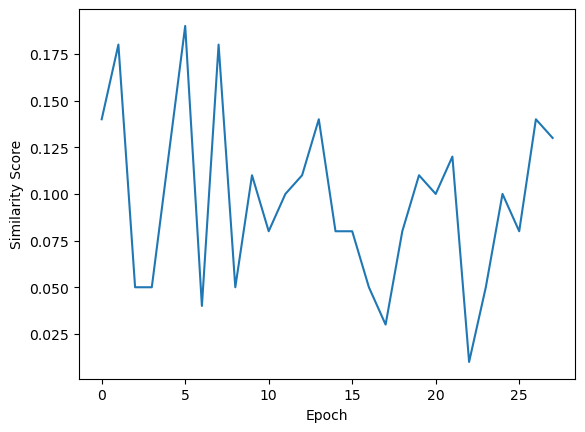

In [9]:

plt.plot(data)
plt.xlabel("Epoch")
plt.ylabel("Similarity Score")
plt.show()


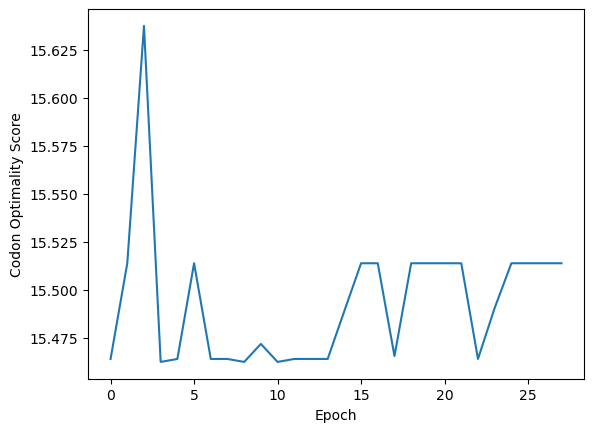

In [10]:
plt.plot(data_cod)
plt.xlabel("Epoch")
plt.ylabel("Codon Optimality Score")
plt.show()

In [23]:
import Bio.SeqIO

def seq_fixer(input, output):
    with open(input) as h:
        with open(output, 'w') as f:
            # q: write instructions to write the id with ">" at the beginning and in the following line the sequence without line breaks
            for record in Bio.SeqIO.parse(h, "fasta"):
                f.write(">" + record.id + "\n")
                f.write(str(record.seq).upper() + "\n")


In [24]:
seq_fixer(r"C:\CRAGjobs\YangLabIntern\codon_optimization\pytorch-transformer\data\augustus\augustus.u9.codingseq", r"C:\CRAGjobs\YangLabIntern\codon_optimization\pytorch-transformer\data\augustus\augustus_coding.txt")
seq_fixer(r"C:\CRAGjobs\YangLabIntern\codon_optimization\pytorch-transformer\data\augustus\augustus.u9.aa", r"C:\CRAGjobs\YangLabIntern\codon_optimization\pytorch-transformer\data\augustus\augustus_aa.txt")
seq_fixer(r"C:\CRAGjobs\YangLabIntern\codon_optimization\pytorch-transformer\data\augustus\augustus.u9.mrna", r"C:\CRAGjobs\YangLabIntern\codon_optimization\pytorch-transformer\data\augustus\augustus_noncoding.txt")

In [12]:
import itertools

tuples = itertools.product('ATCG', repeat=3)
tuples = ["".join(t) for t in tuples]
cod_dict = dict(zip(tuples, [0]*64))
cod_dict    

{'AAA': 0,
 'AAT': 0,
 'AAC': 0,
 'AAG': 0,
 'ATA': 0,
 'ATT': 0,
 'ATC': 0,
 'ATG': 0,
 'ACA': 0,
 'ACT': 0,
 'ACC': 0,
 'ACG': 0,
 'AGA': 0,
 'AGT': 0,
 'AGC': 0,
 'AGG': 0,
 'TAA': 0,
 'TAT': 0,
 'TAC': 0,
 'TAG': 0,
 'TTA': 0,
 'TTT': 0,
 'TTC': 0,
 'TTG': 0,
 'TCA': 0,
 'TCT': 0,
 'TCC': 0,
 'TCG': 0,
 'TGA': 0,
 'TGT': 0,
 'TGC': 0,
 'TGG': 0,
 'CAA': 0,
 'CAT': 0,
 'CAC': 0,
 'CAG': 0,
 'CTA': 0,
 'CTT': 0,
 'CTC': 0,
 'CTG': 0,
 'CCA': 0,
 'CCT': 0,
 'CCC': 0,
 'CCG': 0,
 'CGA': 0,
 'CGT': 0,
 'CGC': 0,
 'CGG': 0,
 'GAA': 0,
 'GAT': 0,
 'GAC': 0,
 'GAG': 0,
 'GTA': 0,
 'GTT': 0,
 'GTC': 0,
 'GTG': 0,
 'GCA': 0,
 'GCT': 0,
 'GCC': 0,
 'GCG': 0,
 'GGA': 0,
 'GGT': 0,
 'GGC': 0,
 'GGG': 0}

In [6]:

def codon_table_from_count(input):
    seq = [input[i:i+3] for i in range(0, len(input), 3)]
    cod_dict = dict(zip(["".join(t) for t in itertools.product('ATCG', repeat=3)], [0]*64))
    for codon in seq:
        cod_dict[codon] = (seq.count(codon) / len(seq)) * 1000/len(seq)
        # normalize frequency of codon over 1000
    return cod_dict


In [28]:
def load_codon_table(input = "C:\Clemente_CRAG\CRAG_Clemente\YangLabIntern\YangLabIntern\codon_optimization\pytorch-transformer\data\codon_table.txt"):
    with open(input) as h:
        cod_dict = {}
        for line in h.readlines():
            line = line.replace("U", "T")
            codon, freq = line.strip().split()
            freq = float(freq)
            cod_dict[codon] = freq
    return cod_dict

print(load_codon_table())

{'TTT': 5.0, 'TCT': 4.7, 'TAT': 2.6, 'TGT': 1.4, 'TTC': 27.1, 'TCC': 16.1, 'TAC': 22.8, 'TGC': 13.1, 'TTA': 0.6, 'TCA': 3.2, 'TAA': 1.0, 'TGA': 0.5, 'TTG': 4.0, 'TCG': 16.1, 'TAG': 0.4, 'TGG': 13.2, 'CTT': 4.4, 'CCT': 8.1, 'CAT': 2.2, 'CGT': 4.9, 'CTC': 13.0, 'CCC': 29.5, 'CAC': 17.2, 'CGC': 34.9, 'CTA': 2.6, 'CCA': 5.1, 'CAA': 4.2, 'CGA': 2.0, 'CTG': 65.2, 'CCG': 20.7, 'CAG': 36.3, 'CGG': 11.2, 'ATT': 8.0, 'ACT': 5.2, 'AAT': 2.8, 'AGT': 2.6, 'ATC': 26.6, 'ACC': 27.7, 'AAC': 28.5, 'AGC': 22.8, 'ATA': 1.1, 'ACA': 4.1, 'AAA': 2.4, 'AGA': 0.7, 'ATG': 25.7, 'ACG': 15.9, 'AAG': 43.3, 'AGG': 2.7, 'GTT': 5.1, 'GCT': 16.7, 'GAT': 6.7, 'GGT': 9.5, 'GTC': 15.4, 'GCC': 54.6, 'GAC': 41.7, 'GGC': 62.0, 'GTA': 2.0, 'GCA': 10.6, 'GAA': 2.8, 'GGA': 5.0, 'GTG': 46.5, 'GCG': 44.4, 'GAG': 53.5, 'GGG': 9.7}


In [27]:
print(load_codon_table())
print(codon_table_from_count("ATGATGATGATGCTGCTGACTGCT"))

def compare_scores(input_seq):
    error_list = []
    seq_by_three = [input_seq[i:i+3] for i in range(0, len(input_seq), 3)]
    for codon in seq_by_three:
        error_list.append(float(load_codon_table()[codon]) - float(codon_table_from_count(input_seq)[codon]))
    return sum(error_list)/len(error_list)
    
print(compare_scores("ATGATGATGATGCTGCTGACTGCT"))


{'TTT': 5.0, 'TCT': 4.7, 'TAT': 2.6, 'TGT': 1.4, 'TTC': 27.1, 'TCC': 16.1, 'TAC': 22.8, 'TGC': 13.1, 'TTA': 0.6, 'TCA': 3.2, 'TAA': 1.0, 'TGA': 0.5, 'TTG': 4.0, 'TCG': 16.1, 'TAG': 0.4, 'TGG': 13.2, 'CTT': 4.4, 'CCT': 8.1, 'CAT': 2.2, 'CGT': 4.9, 'CTC': 13.0, 'CCC': 29.5, 'CAC': 17.2, 'CGC': 34.9, 'CTA': 2.6, 'CCA': 5.1, 'CAA': 4.2, 'CGA': 2.0, 'CTG': 65.2, 'CCG': 20.7, 'CAG': 36.3, 'CGG': 11.2, 'ATT': 8.0, 'ACT': 5.2, 'AAT': 2.8, 'AGT': 2.6, 'ATC': 26.6, 'ACC': 27.7, 'AAC': 28.5, 'AGC': 22.8, 'ATA': 1.1, 'ACA': 4.1, 'AAA': 2.4, 'AGA': 0.7, 'ATG': 25.7, 'ACG': 15.9, 'AAG': 43.3, 'AGG': 2.7, 'GTT': 5.1, 'GCT': 16.7, 'GAT': 6.7, 'GGT': 9.5, 'GTC': 15.4, 'GCC': 54.6, 'GAC': 41.7, 'GGC': 62.0, 'GTA': 2.0, 'GCA': 10.6, 'GAA': 2.8, 'GGA': 5.0, 'GTG': 46.5, 'GCG': 44.4, 'GAG': 53.5, 'GGG': 9.7}
{'ATG': 0.5, 'CTG': 0.25, 'ACT': 0.125, 'GCT': 0.125}
31.543749999999996
